### Energy Invitational Calculations
Formula: Score = 10000000 / (Wh * tot_seconds)

air resistance:
https://www.engineeringtoolbox.com/drag-coefficient-d_627.html

tire rolling resistance:
https://x-engineer.org/rolling-resistance/

Elapsed Time: 1342.1617752599998 seconds
Velocity: 2.235199999954438 m/s - 5 mph
Drag Force: 4.382595621709332 Newtons
Work to overcome drag: 13147.786865127997 Joules
Total Joules: 19268.166870361274
Watt-Hours: 5.352268575100358
Watts: 14.356068862584552
Score: 0


Elapsed Time: 1118.4681460499999 seconds
Velocity: 2.6822399999453257 m/s - 6 mph
Drag Force: 6.310937695261438 Newtons
Work to overcome drag: 18932.813085784313 Joules
Total Joules: 27746.16029332023
Watt-Hours: 7.707266748144514
Watts: 24.8072869945461
Score: 0


Elapsed Time: 958.6869823285714 seconds
Velocity: 3.129279999936213 m/s - 7 mph
Drag Force: 8.589887418550287 Newtons
Work to overcome drag: 25769.66225565086 Joules
Total Joules: 37765.60706590808
Watt-Hours: 10.490446407196696
Watts: 39.39305295893198
Score: 497.16346322330196


Elapsed Time: 838.8511095375 seconds
Velocity: 3.5763199999271005 m/s - 8 mph
Drag Force: 11.219444791575887 Newtons
Work to overcome drag: 33658.33437472766 Joules
Total Joules: 49326

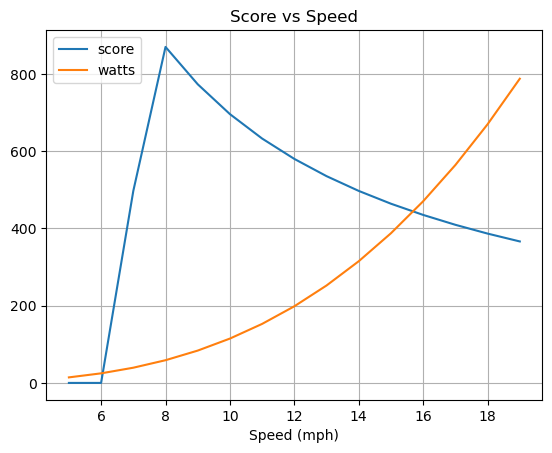

In [32]:
import matplotlib.pyplot as plt

# Vehicle Parameters
vehicle_weight_lbs = 300
vehicle_efficiency = 0.7
vehicle_cd = 0.43
vehicle_frontal_area = 3.4  # frontal area (m^2)

track_distance = 3000 # in meters

def calc_score(vel_mph):
    # everything in joules
    final_velocity = vel_mph / 2.2369362921 # meters per second
    elapsed_time = track_distance/final_velocity
    mass = vehicle_weight_lbs * 0.453592
    drag_force = vehicle_cd * 0.5 * 1.2 * (final_velocity*final_velocity) * vehicle_frontal_area # in newtons
    
    # Work to overcome drag = Fd * dist
    work_overcome_drag = drag_force * track_distance # joules
    
    # E = 1/2*m*v^2
    work_to_accelerate = 0.5 * mass * (final_velocity*final_velocity)
    
    total_work = (work_to_accelerate + work_overcome_drag) / vehicle_efficiency #joules
    watt_hours = total_work * 0.000277777777777778
    
    watts = watt_hours / (elapsed_time/3600)

    print(f"Elapsed Time: {elapsed_time} seconds")
    print(f"Velocity: {final_velocity} m/s - {vel_mph} mph")
    print(f"Drag Force: {drag_force} Newtons")
    print(f"Work to overcome drag: {work_overcome_drag} Joules")
    print(f"Total Joules: {total_work}")
    print(f"Watt-Hours: {watt_hours}")
    print(f"Watts: {watts}")


    score = 10000000/(watt_hours * elapsed_time)
    if elapsed_time > 900 and elapsed_time <= 930:
        score = score * .75
    elif elapsed_time > 930 and elapsed_time <= 960:
        score = score * .50
    elif elapsed_time > 960 and elapsed_time <= 990:
        score = score * .25
    elif elapsed_time > 990:
        score = 0
    print(f"Score: {score}\n\n")
    return score, watts

#print(f"Score: {calc_score(20)}")
x = []
y = []
for i in range(5,20,1):
    x.append(i)
    y.append(calc_score(i))

plt.plot(x,y)
plt.title("Score vs Speed")
plt.xlabel('Speed (mph)')
#plt.ylabel('Score-Watts')
plt.legend(["score","watts"])
plt.grid(True)
plt.show()